# Mandlebrot set visualisation

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Complex numbers native to Python!

In [5]:
demorgan = 1+1j
print(demorgan, type(demorgan))
print(demorgan.conjugate())

(1+1j) <class 'complex'>
(1-1j)


## Mandlebrot set definition:

The subset of complex numbers $c$ in the complex plane such that the function:
$$
f_{c}(z) = z^2 + c
$$
does not diverge to infinity, when $f$ is iterated, from initial condition $z$.

ie, the sequence $ (f_c(0), \ f_c(f_c(0)), \ f_c^3(0), \ ... )$ remains bounded in absolute value.

In [6]:
def mandlebrot_f(c: complex, z: complex) -> complex:
    '''
    Mandlebrot generator function f_c(z)=z^2 + c
    '''
    return z*z + c

First step is to visualise a single sequence f, f(f), f(f(f)),..., iterating N times and plotting

In [25]:
def recursion_list(c: complex, N: int, recursion_func = mandlebrot_f)->list[complex]:
    '''
    Packaging function to recursively call recursion_func N times.
    recursion_func must accept z and c as arguments.
    Returns a list of complex z values 
    '''
    if N <= 0:
        raise ValueError("Please supply a number of iterations over 0.")
    try:
        _ = recursion_func(c=0+0j, z=0+0j)
    except:
        raise Exception("Please change recursion_func so that it accepts c and z as arguments.")

    z: complex = 0+0j
    results = [z]

    # Call recursion func N times on z=0+0i input
    for iter_num in range(N):
        z = recursion_func(c=c,z=z)
        results += [z]
    
    return results

def unpacker(results: list[complex]) -> (np.ndarray, np.ndarray):
    N = len(results)
    x_vals, y_vals = np.zeros(N), np.zeros(N)
    for iter_num in range(N):
        val = results[iter_num]
        x_vals[iter_num], y_vals[iter_num] = val.real, val.imag
    return (x_vals, y_vals)

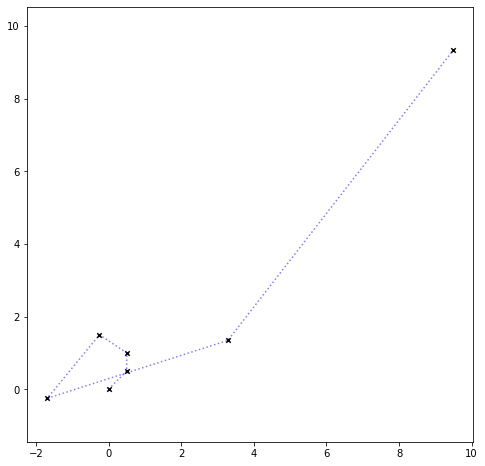

In [26]:
c: complex = 0.5 + 0.5j

x_vals, y_vals = unpacker(recursion_list(c=c,N=6))
fig = plt.figure(figsize=[8,8])

plt.plot(x_vals, y_vals, alpha=0.5, c='b',linestyle=':')
plt.scatter(x_vals, y_vals, marker='x', c='k', s=20)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.axis('equal')
plt.show()

# General plot

Now we make a more general function to find if a point $c \in \mathbb{C}$ diverges under our function